# **Note**

* **PCA helps to minimize the high dimensional data into a smaller set of features that capture most of the important information. This will help simplfy the visualization**

* **LDA helps create a seperation boundary using multiple features, making classification more accurate, especially when the data is having a clear underlying structure**

* **We can say PCA helps in unsupervised ML models, where there are no target. In those cases, LDA can't make separation boundary since there is no distinction b/w data points due to absence of target**

<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv("CSGODataset.csv")
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.shape

(122410, 97)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

**My data is in very high dimensional space, moreover it's a classification problem**

<hr>

**What kind of problem do we have, when we are overloading the model with a lot features?**
  * **Curse of Dimensionality**

<hr>

**Objective**

* **We have to do classification of the winner of the game**
* **We have a lot of features, so we need to reduce the number of features**
* **So, in this case we can use the LDA inorder to reduce our data**

<hr>

In [6]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [7]:
df['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

**In total, we are having two classes. So, the number of LDA components will be 1. Moreover, the data is balanced**

<hr>

**If you are having multiple output classes, so in this scenario use this techique**
  * **min(classes - 1, no_of_features)**

In [8]:
# 8 columns, target = 12
# min(8, 11)
# Components for LDA = 8

In [9]:
a = df.shape
print(f"Rows: {a[0]} and Columns: {a[1]}")

Rows: 122410 and Columns: 97


**Data Pre-processing**

In [10]:
# check null values
df.isnull().sum().sum()

0

In [11]:
# check duplicates
df.duplicated().sum()

4962

In [12]:
# handle duplicates - by dropping them
df = df.drop_duplicates()
df.duplicated().sum()

0

**EDA**

**How many maps are presents in the given dataset in form of percentage?**

In [15]:
df['map'].value_counts(normalize = True)*100

de_inferno     19.567809
de_dust2       18.094816
de_nuke        15.392344
de_mirage      15.149683
de_overpass    11.472311
de_train       10.999762
de_vertigo      9.199816
de_cache        0.123459
Name: map, dtype: float64

From here, the de_inferno is the most famous map in the given, and de_cache is the least favourite

<hr>

**Given that the map is de_inferno, what was the number of times either of team won?**

In [18]:
df[df['map'] == 'de_inferno']['round_winner'].value_counts()

T     12511
CT    10471
Name: round_winner, dtype: int64

In [19]:
df[df["map"] == "de_dust2"]["round_winner"].value_counts()

T     11603
CT     9649
Name: round_winner, dtype: int64

\**Can we say that overall, the `T` team has won more number of rounds as compared with `CT`**

<hr>

**Encoding**

In [21]:
le = LabelEncoder()

In [22]:
cat_col = []

for col in df.columns:
    if((df[col].dtype == 'object') | (df[col].dtype == 'bool')):
        cat_col.append(col)
        
cat_col

['map', 'bomb_planted', 'round_winner']

In [23]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
df.head(2)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Split the Data : Independent & Dependent Features**

In [24]:
# Independent Features
x = df.drop('round_winner', axis=1)

# Dependent Feature
y = df['round_winner']

**Split the Data into Train & Test**

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=34)

**Standardization**

In [26]:
sc = StandardScaler()

In [27]:
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.transform(xtest)

**Implementing LDA to Reduce Features**

In [29]:
lda = LDA()
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [30]:
lda.transform(xtest)

array([[-0.8382772 ],
       [-0.20456585],
       [-1.19435147],
       ...,
       [ 2.25269187],
       [ 0.5231942 ],
       [ 1.49582956]])

In [32]:
# Calculate the Importance associated with the data
pd.DataFrame(lda.coef_)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.002487,-0.004158,0.004099,-0.041713,0.760856,-0.003247,0.002292,-0.003525,0.003682,-0.000018,...,0.015021,-0.106491,0.047917,-0.123385,0.066642,-0.086623,0.043077,-0.065746,0.002976,0.10817


**`This coefficients that we have got, this tells you that how much is the contribution of these features in constructing your separation line`**

**LDA focuses on maximizing the separation between two or more given classes, while minimizing their spread**

In [34]:
# Trying to increase the quantitative value of these coefficients
lda_coef = np.exp(np.abs(lda.coef_ )).flatten()           # using flatten to reduce dimension of array from 2D to 1D
lda_coef

array([ 1.00249013,  1.00416682,  1.00410741,  1.04259547,  2.14010802,
        1.00325216,  1.00229456,  1.00353098,  1.00368916,  1.00001837,
        1.00001342,  1.02400932,  1.03476114,  1.02515224,  1.20534745,
        1.35440363,  1.38637573,  1.57874508,  1.58156416,  1.50568053,
        1.58965979,  1.66684633,  1.        ,  1.21108922,  1.03373373,
        1.00912376,  1.14620083,  1.36781195,  1.44439396,  2.06368984,
        1.        ,  1.84884239,  1.63054104,  1.39103328,  1.27514113,
        1.10397744, 33.88961167,  1.        ,  1.41300587,  2.34507357,
        1.47156067,  1.5554446 ,  1.12867992,  1.30260623,  1.40642291,
        1.90854241,  1.34416201,  1.99643364,  1.2179165 ,  1.30837849,
        1.27253517,  1.62782618,  1.        ,  1.        ,  1.63416779,
       23.83426206,  7.16306656,  3.04233561,  1.        ,  1.58881059,
        1.        ,  3.36523069,  1.36880108,  1.        ,  1.45234115,
        1.64612401,  1.35307522,  1.12610034,  1.21661424,  1.56

In [35]:
# Analyzing Best and Important Features in our data
no_of_features = x.shape[1]
no_of_features

96

In [36]:
# Arrange these features into a list of no.s
features_list = np.arange(no_of_features)
features_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [37]:
feature_names = list(x.columns)
feature_names

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

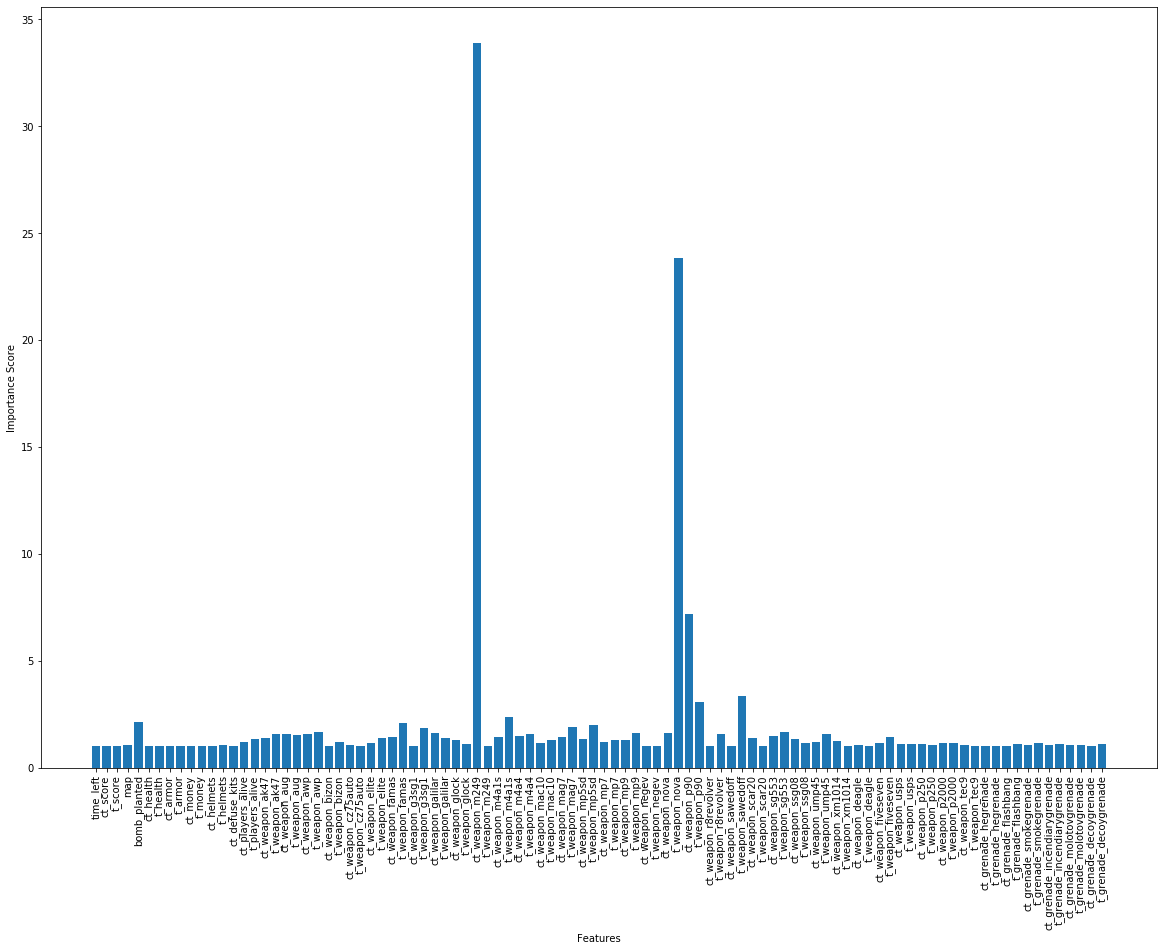

In [44]:
# Visualize the Importance of these features
plt.figure(figsize = (20,14))
plt.bar(features_list, lda_coef)
plt.xticks(features_list, feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [48]:
df_feature_score = pd.DataFrame({'feature' : feature_names, 'Importance_score' : lda_coef})
df_feature_score.head()

,feature,Importance_score
0,time_left,1.002490
1,ct_score,1.004167
2,t_score,1.004107
3,map,1.042595
4,bomb_planted,2.140108


In [49]:
# Selecting top 10 features
top_10_features = df_feature_score.nlargest(10, 'Importance_score')         # nlargest(no_of_features, 'top_basedon_feature')
top_10_features

,feature,Importance_score
36,ct_weapon_m249,33.889612
55,t_weapon_nova,23.834262
56,ct_weapon_p90,7.163067
61,t_weapon_sawedoff,3.365231
57,t_weapon_p90,3.042336
39,t_weapon_m4a1s,2.345074
4,bomb_planted,2.140108
29,t_weapon_famas,2.063690
47,t_weapon_mp5sd,1.996434
45,t_weapon_mag7,1.908542


**These are the top 10 features that will have the maximum contribution in building the separation line, moreover, this will allows us to correctly classify the data based on the separation line**

<hr>

<img src = "https://imgs.search.brave.com/U7euU0VnN0H6Lv8i5ga5UR2lhZr6o2VoYWxIoJRFo8s/rs:fit:500:0:0/g:ce/aHR0cHM6Ly91cGxv/YWQud2lraW1lZGlh/Lm9yZy93aWtpcGVk/aWEvY29tbW9ucy90/aHVtYi83LzdlL0lu/dGVyc2VjdGluZ19w/bGFuZXMuc3ZnLzY0/MHB4LUludGVyc2Vj/dGluZ19wbGFuZXMu/c3ZnLnBuZw"/>

<hr>

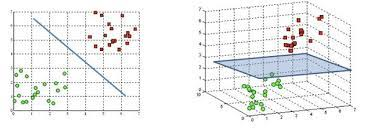


<hr>

**Selecting the best columns for the seperation**

**Model for Non-LDA Data**

In [51]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [82]:
# Logistic Regression
lr.fit(xtrain_scaled,ytrain)
ypred = lr.predict(xtest_scaled)
print(classification_report(ypred, ytest))
print("Accuracy score: ", accuracy_score(ypred, ytest))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     14700
           1       0.75      0.76      0.76     14662

    accuracy                           0.75     29362
   macro avg       0.75      0.75      0.75     29362
weighted avg       0.75      0.75      0.75     29362

Accuracy score:  0.7546488658810707


In [83]:
# Decision Tree
dt.fit(xtrain_scaled,ytrain)
ypred = dt.predict(xtest_scaled)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     14343
           1       0.81      0.81      0.81     15019

    accuracy                           0.81     29362
   macro avg       0.81      0.81      0.81     29362
weighted avg       0.81      0.81      0.81     29362



In [84]:
# Random Forest
rf.fit(xtrain_scaled,ytrain)
ypred = rf.predict(xtest_scaled)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     14825
           1       0.85      0.88      0.87     14537

    accuracy                           0.87     29362
   macro avg       0.87      0.87      0.87     29362
weighted avg       0.87      0.87      0.87     29362



**Model for LDA-Based Data**

In [76]:
# LDA based features
x_selected = df[top_10_features['feature']]

# Target feature
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 117448, dtype: int32

In [77]:
# Standardize data
x_selected_scaled = sc.fit_transform(x_selected)

In [78]:
# train-test split
xtrain_lda,xtest_lda,ytrain_lda,ytest_lda = train_test_split(x_selected_scaled,y,test_size=0.25, random_state=21)

In [79]:
# Logistic Regression
lr.fit(xtrain_lda,ytrain_lda)
ypred_lda = lr.predict(xtest_lda)
print(classification_report(ypred_lda,ytest_lda))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     25725
           1       0.19      0.78      0.31      3637

    accuracy                           0.56     29362
   macro avg       0.57      0.66      0.49     29362
weighted avg       0.85      0.56      0.63     29362



In [80]:
# Decision Tree
dt.fit(xtrain_lda,ytrain_lda)
ypred_lda = dt.predict(xtest_lda)
print(classification_report(ypred_lda,ytest_lda))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     25728
           1       0.19      0.79      0.31      3634

    accuracy                           0.56     29362
   macro avg       0.57      0.66      0.49     29362
weighted avg       0.85      0.56      0.63     29362



In [81]:
# Random Forest
rf.fit(xtrain_lda,ytrain_lda)
ypred_lda = rf.predict(xtest_lda)
print(classification_report(ypred_lda,ytest_lda))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68     25727
           1       0.19      0.79      0.31      3635

    accuracy                           0.56     29362
   macro avg       0.57      0.66      0.49     29362
weighted avg       0.85      0.56      0.63     29362

